In [68]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

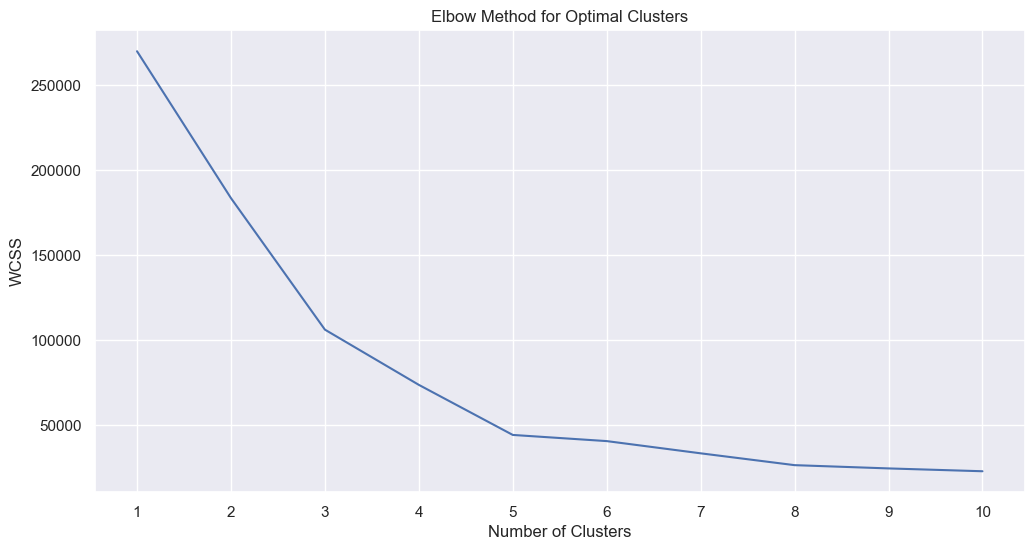

In [69]:
# Initialize DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Create X variable
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

# Within Clusters Sum of Squares variable
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    # Append inertia to wcss
    wcss.append(kmeans.inertia_)
    
# Check for optimum number of clusters using elbow plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=wcss)
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1, 11, 1))
plt.show()

# K-Means Clustering

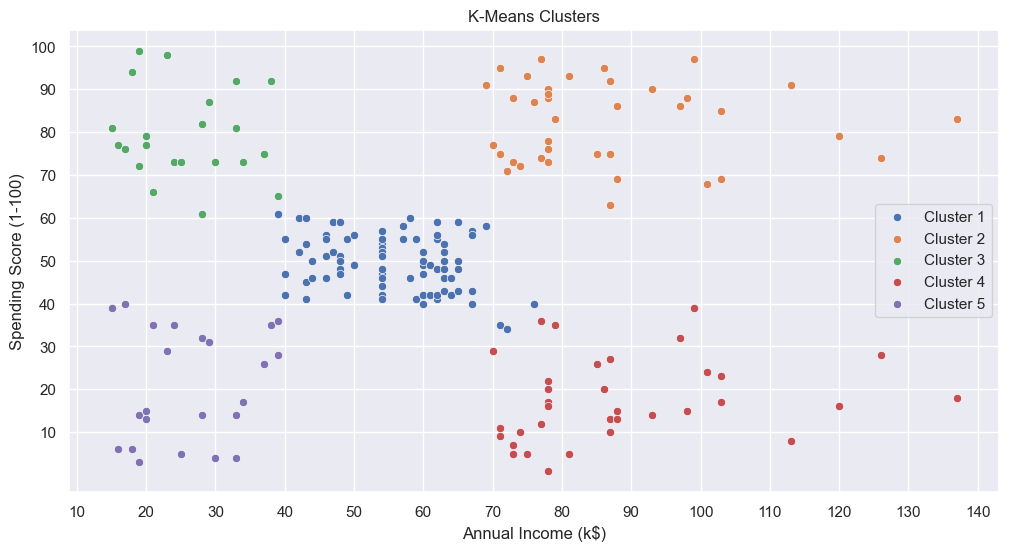

In [70]:
# Create model
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans_model.fit(X)

# Predict clusters
kmeans_pred = kmeans_model.predict(X)

# Visualize K-Means Clusters
plt.figure(figsize=(12, 6))
for cluster in range(5):
    # Create cluster
    cluster_data = X[kmeans_pred == cluster]
    # Plot cluster
    sns.scatterplot(x=cluster_data[:, 0], y=cluster_data[:, 1], label=f"Cluster {cluster+1}")
plt.title("K-Means Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.xticks(np.arange(10, 141, 10))
plt.yticks(np.arange(10, 101, 10))
plt.show()

# DBSCAN Clustering

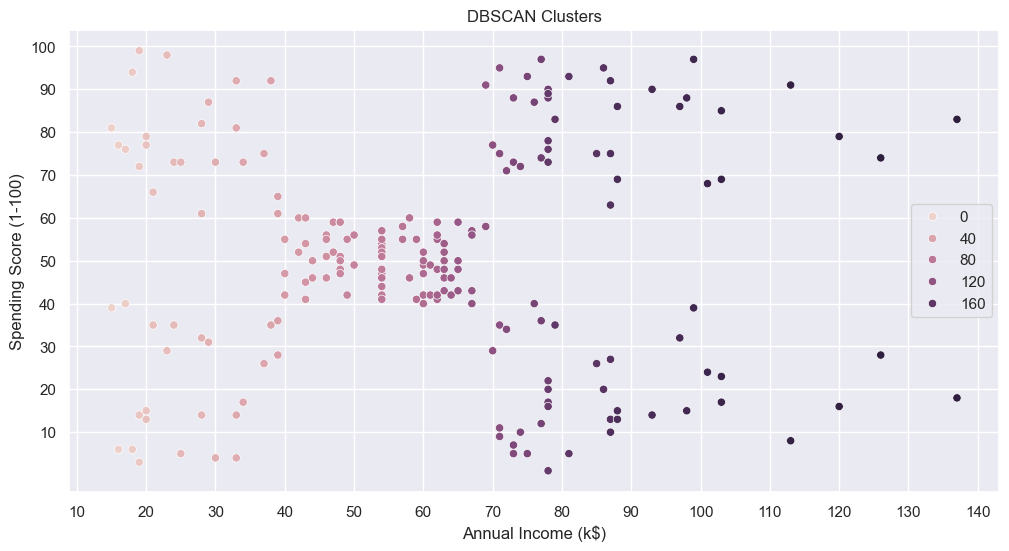

In [71]:
# Create DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=1)

# Fit the model and predict clusters
dbscan_pred = dbscan_model.fit_predict(X)

# Visualize DBSCAN Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_pred)
plt.title("DBSCAN Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.xticks(np.arange(10, 141, 10))
plt.yticks(np.arange(10, 101, 10))
plt.show()

# Hierarchical Clustering

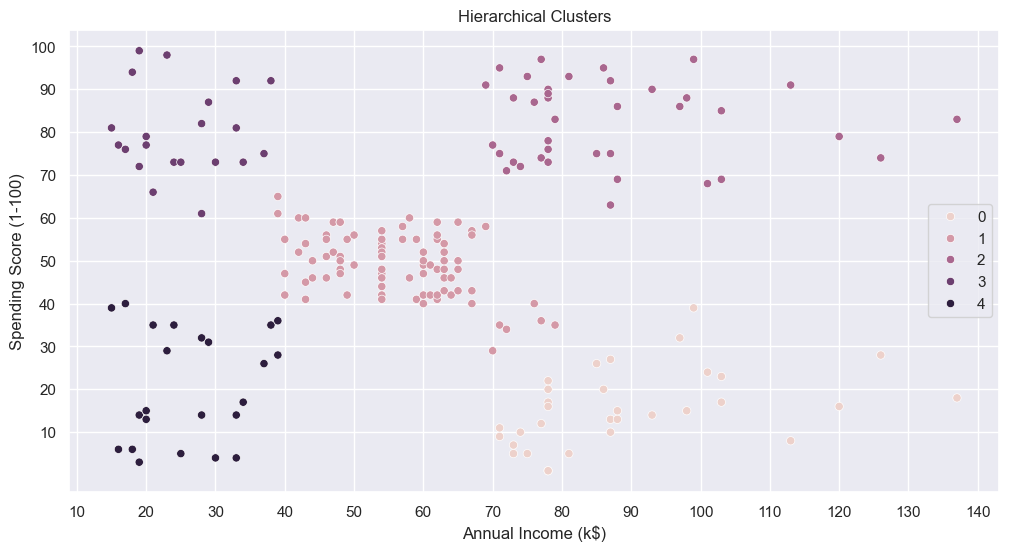

In [77]:
# Create Hierarchical Clustering model
agg_model = AgglomerativeClustering(n_clusters=5)
# Fit model and predict clusters
agg_pred = agg_model.fit_predict(X)

# Visualize Agglomerative Clustering results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_pred)
plt.title("Hierarchical Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.xticks(np.arange(10, 141, 10))
plt.yticks(np.arange(10, 101, 10))
plt.show()

# Comapre Models

In [73]:
# Analyze silhouette scores for each model
kmeans_score = silhouette_score(X, kmeans_pred)
dbscan_score = silhouette_score(X, dbscan_pred)
agg_score = silhouette_score(X, agg_pred)

# Pint out scores
print(f"K-Means Clustering Silhouette Score: {round(kmeans_score, 2)}")
print(f"DBSCAN Clustering Silhouette Score: {round(dbscan_score, 2)}")
print(f"Agglomerative Clustering Silhouette Score: {round(agg_score, 2)}")

K-Means Clustering Silhouette Score: 0.55
DBSCAN Clustering Silhouette Score: 0.04
Agglomerative Clustering Silhouette Score: 0.55
